In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=17hQl9e8gvJtdDy8g-7ZOlf0uv9MKvNL7'

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Housing.csv')  
dataset = pd.read_csv('Housing.csv')

In [0]:
print(dataset.shape)
print(dataset.columns)

(546, 13)
Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')


In [0]:
slicedData = dataset[['price', 'lotsize']]
print(slicedData.shape)
print(slicedData.columns)
print(slicedData.head)

(546, 2)
Index(['price', 'lotsize'], dtype='object')
<bound method NDFrame.head of         price  lotsize
0     42000.0     5850
1     38500.0     4000
2     49500.0     3060
3     60500.0     6650
4     61000.0     6360
..        ...      ...
541   91500.0     4800
542   94000.0     6000
543  103000.0     6000
544  105000.0     6000
545  105000.0     6000

[546 rows x 2 columns]>


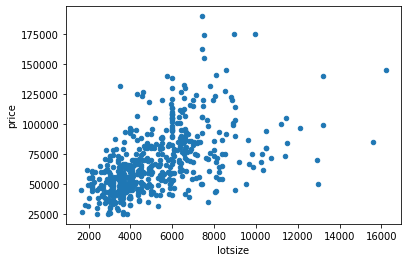

In [0]:
# scatter plot
slicedData.plot(kind='scatter', x='lotsize', y='price')
plt.show()

In [0]:
matrix = np.array(slicedData.values, 'float')
matrix[0:5,:]

array([[42000.,  5850.],
       [38500.,  4000.],
       [49500.,  3060.],
       [60500.,  6650.],
       [61000.,  6360.]])

In [0]:
X = matrix[:,1]
Y = matrix[:,0]

X = independent variable i.e lot size
Y = dependent variable ie. price of the house

In [0]:
# noramlization of independent variable 
# divide independent variable by maximum value
X = X/(np.max(X))

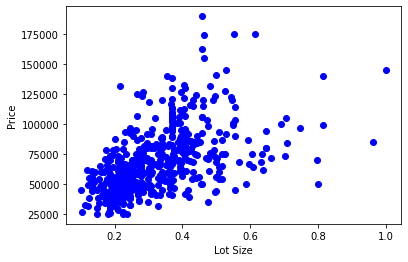

In [0]:
plt.plot(X, Y, 'bo')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.show()

y = mx + c is the eqaution of the line
we need to find optimal values of m and c so as to reduce the cost function
we have theta0 and theta1 as arbitrary constanta that need to be set 

In [0]:
# cost function
def computecost(x, y, theta):
    a = 1/(2*m)
    b = np.sum(((X@theta)-Y)**2)
    j = (a)*(b)
    return j

In [0]:
# initialising parameters
m = np.size(Y)
X = X.reshape([546,1])
x = np.hstack([np.ones_like(X), X])

theta = np.zeros([2,1])

In [0]:
# cheaching cost at theta=0
print(computecost(x,Y,theta))

1461172085457.0


our aim is to reduce this cost value further,
so that we can achieve the optimal linear fit for our data


Gradient descend is a one such algorithm used to find the optimal parameter ‘theta’ using the given parameters,

x — Input values

y — output values

Initial_theta — in most cases NULL theta

alpha — rate at which gradient pointer descending to optimal value

iteration — setting how many iteration it should take

In [0]:
# defining Gradient Descent Algorithm
def gradient(x, y, theta):
    alpha = 0.00001
    iteration = 20000
    J_history = np.zeros([iteration,1]);

    for iter in range(0,20000):
        error = (x @ theta) -y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:,0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:,1]))
        theta = np.array([temp0,temp1]).reshape(2,1)
        J_history[iter] = (1 / (2*m) ) * (np.sum(((x @ theta)-y)**2))
    return theta, J_history

In [0]:
# using gradient descend to compute optimal theta values
theta, J = gradient(x, Y, theta)
print(theta)

[[ -9946.73198526]
 [247297.37276352]]


In [0]:
# computing the cost value for this theta
print(J)

[[2.10662998e+11]
 [2.10668341e+11]
 [2.10673686e+11]
 ...
 [4.92847912e+11]
 [4.92870792e+11]
 [4.92893673e+11]]


as we can see the cost values are much lower than 1461172085457.0
which was computed using theata as zero

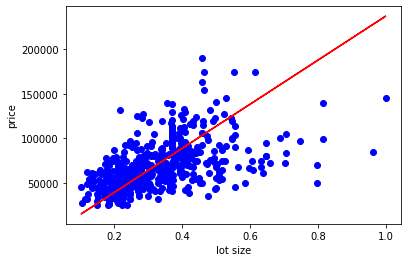

In [0]:
# ploting the line
plt.plot(X,Y,'bo')
plt.plot(X,x@theta,'r-')
plt.ylabel('price')
plt.xlabel('lot size')
plt.show()

In [1]:
# predicting using the value of theta
predict = [1, (6360/np.max(matrix[:,1]))]@theta
# normalizing input value, 1 is for intercept
print(predict)

NameError: name 'np' is not defined